

1.   Abiyyu Daffa Haidar Setiawan  1301213519
2.   Hanif Aditia Sofian   1301213550






In [ ]:
import cv2
from sklearn.cluster import KMeans
from skimage.feature import hog
import pickle
from scipy.spatial.distance import cdist
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import svm
from skimage import feature
from skimage.color import rgb2gray
from skimage import color

In [ ]:
!gdown --id 12DWmjL6LNLsNye-3o-il-Hw4GDgu6yOh

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=12DWmjL6LNLsNye-3o-il-Hw4GDgu6yOh
From (redirected): https://drive.google.com/uc?id=12DWmjL6LNLsNye-3o-il-Hw4GDgu6yOh&confirm=t&uuid=7b3a8d3b-8e76-4f0e-b38f-5bc035b4d76b
To: /content/Dataset5000.zip
100% 590M/590M [00:08<00:00, 66.0MB/s]


In [ ]:
!unzip -q /content/Dataset5000.zip -d /content/dataset

## prepare 1000

In [ ]:
import os
import shutil
import tensorflow as tf

# Define your dataset path
dataset_path = "/content/dataset/Dataset5000"
output_path = "/content/dataset/selected_images"

# Create output directories
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=(224, 224),
    batch_size=64,
    label_mode='int',
    shuffle=True,
    seed=42
)

# Get class names
class_names = dataset.class_names

# Process each class
for class_index, class_name in enumerate(class_names):
    class_folder = os.path.join(output_path, class_name)
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)

    # Track the number of images copied
    count = 0

    for images, labels in dataset:
        for i in range(images.shape[0]):
            if count < 100 and labels[i].numpy() == class_index:
                # Save the image
                img = tf.keras.preprocessing.image.array_to_img(images[i])
                img.save(os.path.join(class_folder, f"{class_name}_{count}.jpg"))
                count += 1

            if count >= 100:
                break

        if count >= 100:
            break

print("Images have been saved.")



Found 5968 files belonging to 10 classes.
Images have been saved.


In [ ]:
def load_1000(folder):
    images = []
    labels = []
    class_names = os.listdir(folder)

    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(folder, class_name)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                img_path = os.path.join(class_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    images.append(img)
                    labels.append(label)
    return images, labels

images, labels = load_1000("/content/dataset/selected_images")
print(f"Loaded {len(images)} images with {len(set(labels))} classes.")

Loaded 1000 images with 10 classes.


## Feature extraction

In [ ]:
def HOG(image, ppc):
  image = color.rgb2gray(image)
  feature,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
  return feature,hog_image

In [ ]:
# image_desctiptors = extract_sift_features(images)
ppc = 16
hog_img = []
hog_features = []

for i in images:
  feature,hog_image = HOG(i,ppc)
  hog_img.append(hog_image)
  hog_features.append(feature)

hog_features = np.array(hog_features)

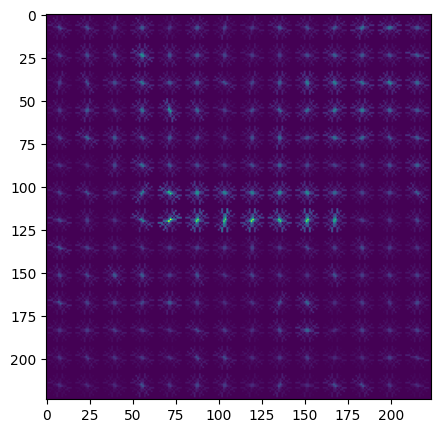

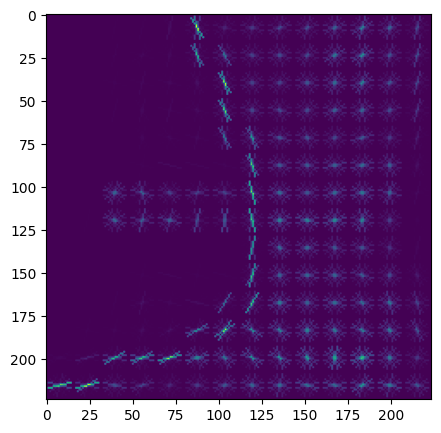

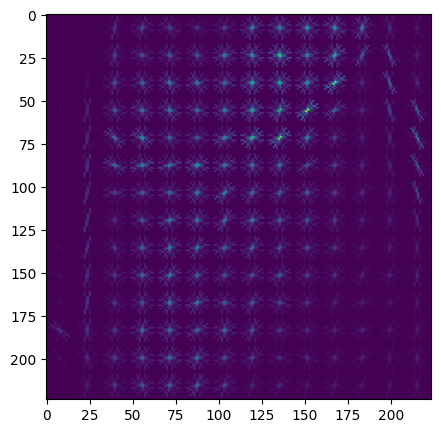

In [ ]:
# show_examples(images, X_features)
for i in range(min(3, len(images))):
  plt.figure(figsize=(15, 5))
  plt.imshow(hog_img[i])


## Model

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(hog_features, labels, test_size = 0.2, random_state = 42)
model_svm = svm.SVC(kernel='rbf',C = 40, random_state = 42)

In [ ]:
model_svm.fit(X_train, Y_train)

SVC(C=40, random_state=42)

In [ ]:
y_pred = model_svm.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred, average='weighted')
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.215
F1 Score: 0.2035940041767347
Precision: 0.22710669047453944
Recall: 0.215


<Figure size 1000x800 with 0 Axes>

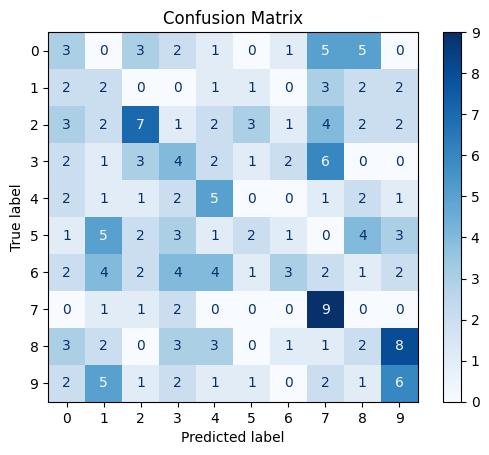

In [ ]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()